In [129]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [138]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image
import matplotlib

In [139]:
df = pd.read_csv('C:/Users/lll/Desktop/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Data Cleaning

After read the csv file, we have found that this file contain some data that we do not need. The column'listed_in'does not concern about my research project. So I decide to delete this column to make the analysis more easier. 

In [140]:
df.drop(columns=['listed_in'], axis=1)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Visualization

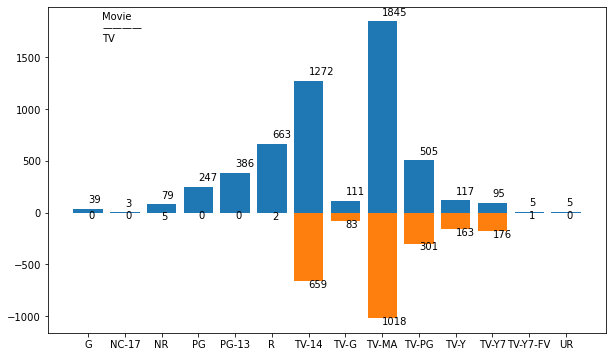

In [133]:
mf = df.groupby('type')['rating'].value_counts().unstack().sort_index().fillna(0).astype(int)
movie = mf.loc['Movie']
tv = - mf.loc['TV Show']

fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.bar(movie.index, movie, label='Movie')
ax.bar(tv.index, tv, label='TV Show')

for i in tv.index:
    ax.annotate(f"{-tv[i]}", 
                   xy=(i, tv[i] - 60))   
for i in movie.index:
    ax.annotate(f"{movie[i]}", 
                   xy=(i, movie[i] + 60))

fig.text(0.2,0.85,"Movie")
fig.text(0.2,0.825,"————")
fig.text(0.2,0.8,"TV")

plt.show()

From this chart, we can see that overall Netflix releases far more movies than TV shows. Among the various ratings, TV-14 and TV-MV are the two categories with the highest number of releases. In the restricted category, Netflix mainly distributes movies, and the number of TV series is much smaller in comparison. For example, in PG, PG-13, G, NC-17, UR, Netflix did not release any TV titles.

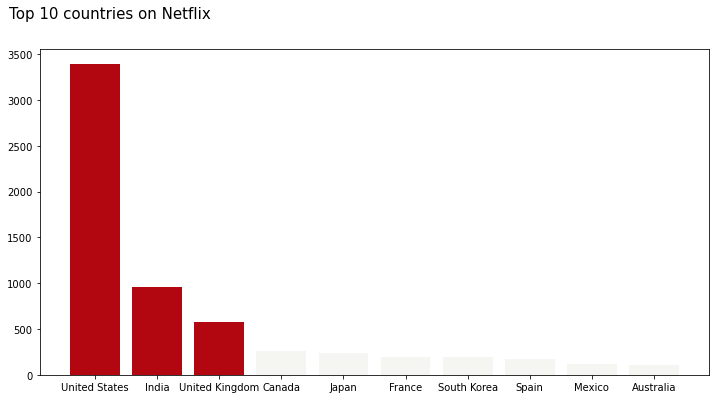

In [199]:
df['count'] = 1
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
df['first_country'].head()
data = df.groupby('first_country')['count'].sum().sort_values(ascending=False)[:10]

fig, ax = plt.subplots(1,1, figsize=(12, 6))
ax.bar(data.index, data, color=color_map) 

fig.text(0.09, 0.95, 'Top 10 countries on Netflix', fontsize=15)

plt.show()

The most prolific producers of content for Netflix are, the USA India and the UK. There is also a significant distance among them.The U.S. has more than three times the number of India.The United States has produced more works than the next nine countries combined.

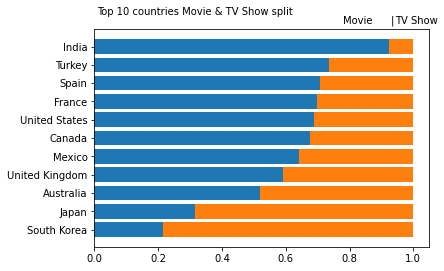

In [198]:
country_order = df['first_country'].value_counts()[:11].index
data = df[['type', 'first_country']].groupby('first_country')['type'].value_counts().unstack().loc[country_order]
data['sum'] = data.sum(axis=1)
data_ratio = (data.T / data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]
fig, ax = plt.subplots(1,1)

ax.barh(data_ratio.index, data_ratio['Movie'])
ax.barh(data_ratio.index, data_ratio['TV Show'], left=data_ratio['Movie'])

fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split')   
fig.text(0.7,0.9,"Movie")
fig.text(0.81,0.9,"|")
fig.text(0.82,0.9,"TV Show")

plt.show()

Among the top 10 countries, all except Japan and South Korea have more movies than TV series. The most disparate ratio is in India, where the number of movies is much larger than the number of TV series. The highest ranking country in the previous chart, the United States, has slightly more movies than TV shows.

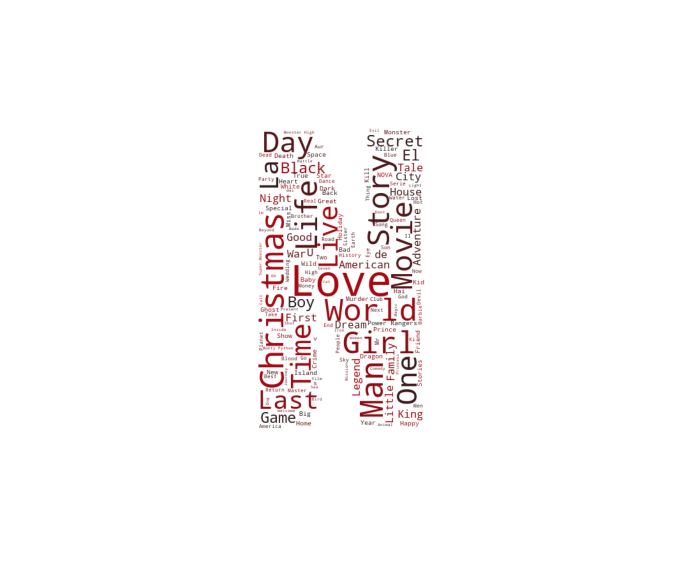

In [166]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])
text = str(list(df['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
mask = np.array(Image.open('C:/Users/lll/Desktop/N2.jpg'))
wordcloud = WordCloud(background_color = 'white',colormap=cmap, max_words = 150, mask = mask).generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

We can use word clouds to analyze the titles of movies. The words that appear more often are love christmas world day and so on. We can also find out the main creative direction of Netflix works.